In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### Load circulatory network
Here we load the solved circulatory network, that is, a network that has the pressure of all nodes and flow of all edges as networkx attributes.

In [9]:
# WHO GENERATES THIS ONE?
dinet = pd.read_pickle("../output/data/solved_flow_networks/solved_main_network.p")

To generate this file, run
```bash
$ make output/data/solved_flow_networks/solved_main_network.p
```

In [10]:
nodes = list(dinet.nodes)
pressure_dict = nx.get_node_attributes(dinet, "pressure")
positions_dict = nx.get_node_attributes(dinet, "position")

flow_dict = nx.get_edge_attributes(dinet, "flow")
for (u, v), f in flow_dict.copy().items():
    flow_dict[(v, u)] = f

pressure = np.array([
    pressure_dict[x]
    for x in nodes
])

position = np.array([
    positions_dict[x]
    for x in nodes
])
pos = dict(zip(nodes, np.array([
    position.T[0],
    position.T[2]
]).T))

### remove edges in the neck

In [11]:
for edge in list(dinet.edges):
    z0 = positions_dict[edge[0]][2]
    z1 = positions_dict[edge[1]][2]

    th = 1425
    if ((z0 > th) and (z1 < th)) or ((z1 > th) and (z0 < th)):
        dinet.remove_edge(edge[0], edge[1])

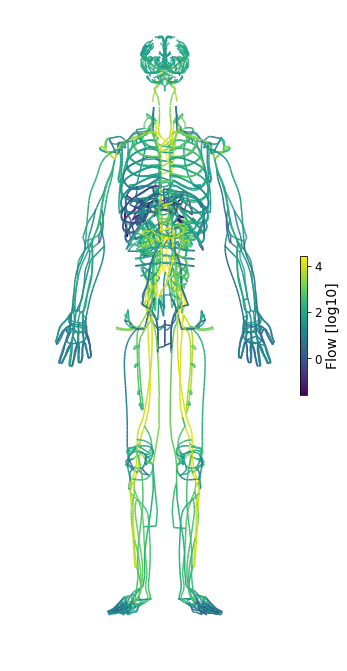

In [13]:
edge_color_log = [
    np.log10(flow_dict[x])
    for x in dinet.to_undirected().edges()
]
vmin, vmax = np.percentile(edge_color_log, [0.5, 99.5])

fig, ax = plt.subplots(1, 1, figsize=(5, 10), tight_layout=True)
ax.set_aspect(1)
sc = nx.draw_networkx_edges(
    G=dinet.to_undirected(),
    pos=pos,
    ax=ax,
    edge_color=edge_color_log,
    edge_vmin=vmin,
    edge_vmax=vmax,
    width=1.5
)
nx.draw_networkx_nodes(
    G=dinet.to_undirected(),
    pos=pos,
    ax=ax,
    node_size=0,
    node_color="0.3",
)
fig.colorbar(sc, shrink=0.2, label="Flow [log10]")
ax.set_axis_off()
fig.savefig("../figures/whole-body-flow-plots/main-flow-logscale.png", dpi=300)